## Importing libraries that will be used in this notebook

In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
from sklearn import datasets


# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
    
import os
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import silhouette_samples

import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

<IPython.core.display.Javascript object>

## Loading Iris Dataset

In [2]:
iris = datasets.load_iris()

df_x = iris.data
df_y = iris.target

### Coverting np.array to dataframe

In [3]:
iris = pd.DataFrame(df_x, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris['species'] = df_y
target = iris['species']
X = pd.DataFrame(df_x, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Determining the number of rows and columns

In [4]:
iris.shape

(150, 5)

### summary of all the numeric columns in the dataset

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking Missing Values

In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Checking Unique Values of Target

In [7]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [8]:
listt = [x for x in range(1,151)]
index = pd.DataFrame(listt)
iris['ID'] = index
tmp = iris.drop('ID', axis=1)

## Data Visualization

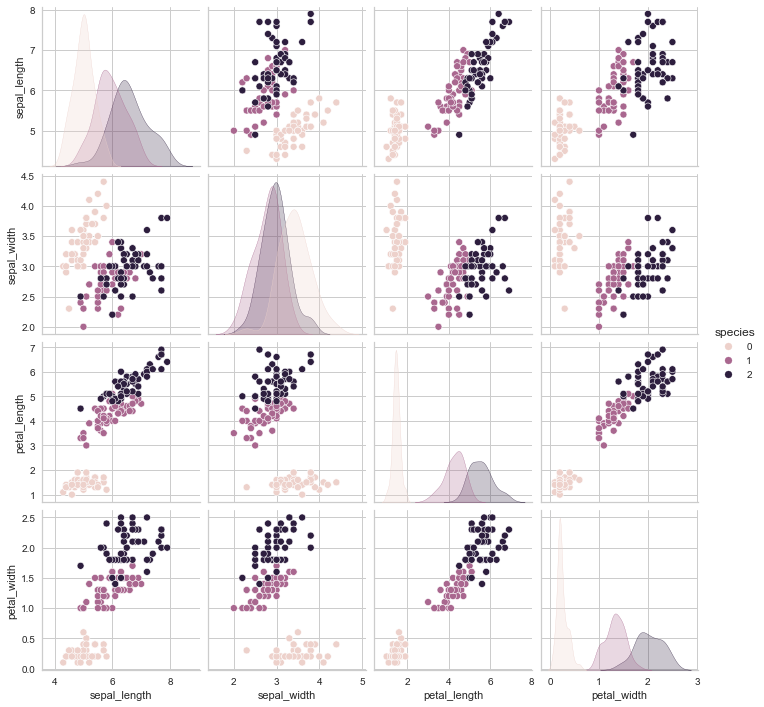

In [9]:
overal_view = sns.pairplot(tmp, hue= 'species')
plt.show()

## Plotting The Frequency of The Observation

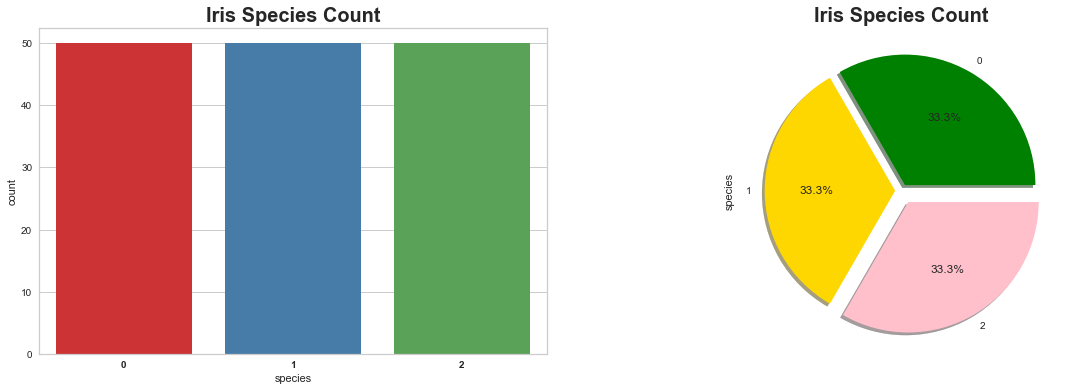

In [10]:
plt.figure(figsize=(20, 6))
cols = ['green', 'gold','pink']
plt.subplot(1,2,1)
sns.countplot('species',data=iris, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.subplot(1,2,2)
iris['species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.show()

## Jointplot

<Figure size 864x720 with 0 Axes>

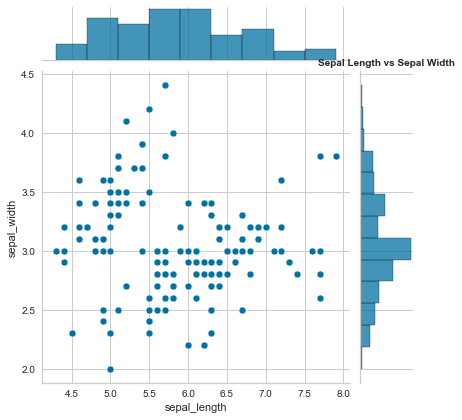

In [11]:
plt.figure(figsize=(12,10))
sns.jointplot(x='sepal_length',y='sepal_width',data=iris)
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=10)
plt.show()

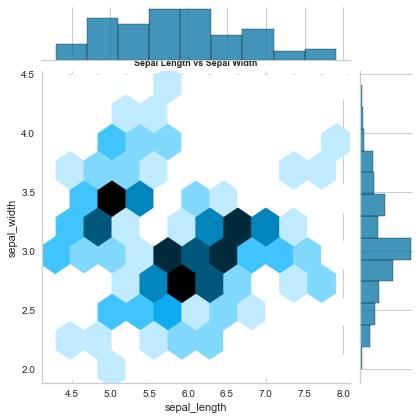

In [12]:
fig=sns.jointplot(x='sepal_length',y='sepal_width',kind='hex',data=iris)
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=9)
plt.show()

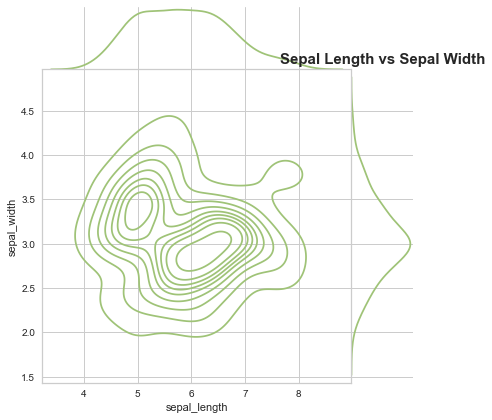

In [13]:
sns.jointplot('sepal_length','sepal_width', data=iris, kind="kde",space=0,color='g')
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=15)
plt.show()

### Visualizing The Data - scatter plots based on Sepal and Petal width and length

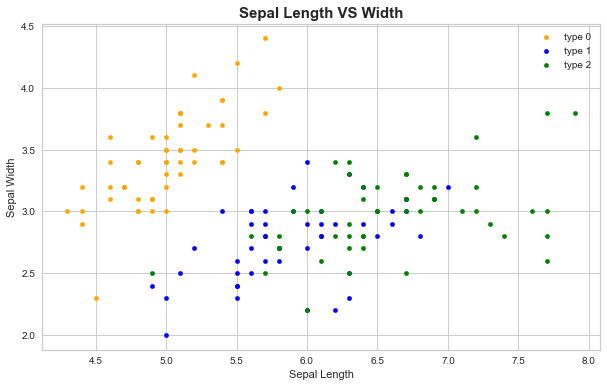

In [14]:
fig = iris[iris.species== 0].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='type 0')
iris[iris.species== 1].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='type 1',ax=fig)
iris[iris.species== 2].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='type 2', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width", fontweight='bold',size=15)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

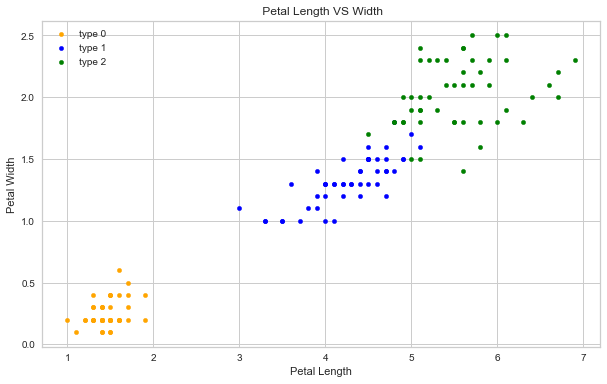

In [15]:
fig =iris[iris.species== 0].plot.scatter(x='petal_length',y='petal_width',color='orange', label='type 0')
iris[iris.species==1].plot.scatter(x='petal_length',y='petal_width',color='blue', label='type 1',ax=fig)
iris[iris.species==2].plot.scatter(x='petal_length',y='petal_width',color='green', label='type 2', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## Probability Density

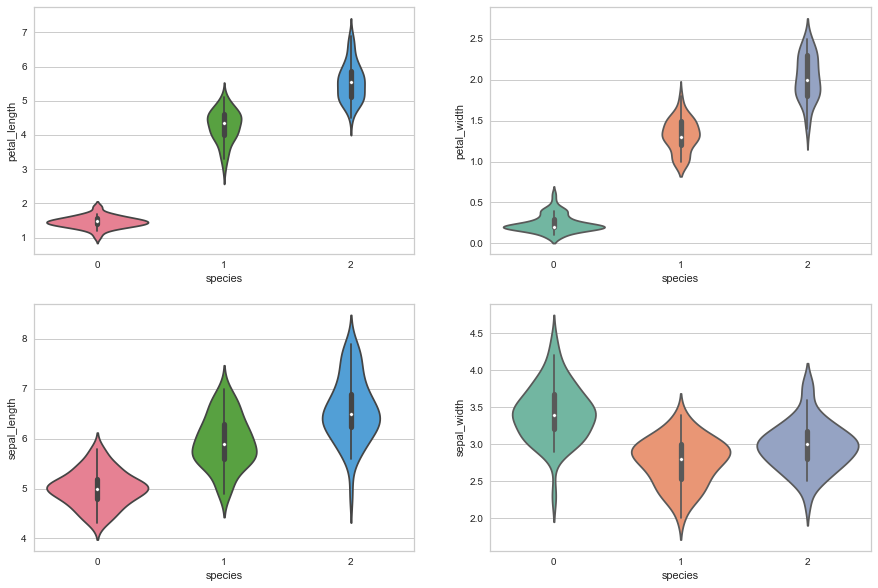

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris,palette='husl')
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris, palette='Set2')
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris,palette='husl')
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris,palette='Set2')
plt.show()

## Heatmap

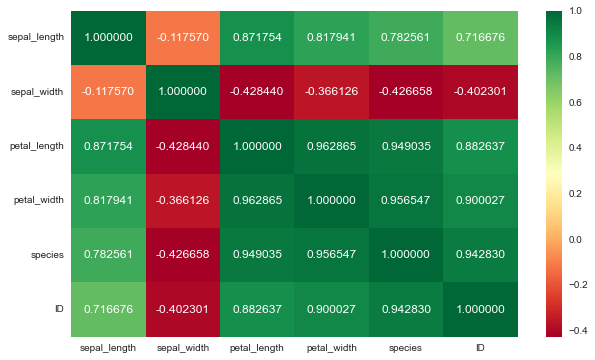

In [17]:
plt.figure(figsize=(10,6)) 
sns.heatmap(iris.corr(),annot=True,fmt="f",cmap="RdYlGn")
plt.show()

In [18]:
iris.drop('species', axis =1, inplace = True)

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,4
4,5.0,3.6,1.4,0.2,5


In [20]:
feature = iris.columns[:4]
for i in enumerate(feature):
    print(i)

(0, 'sepal_length')
(1, 'sepal_width')
(2, 'petal_length')
(3, 'petal_width')


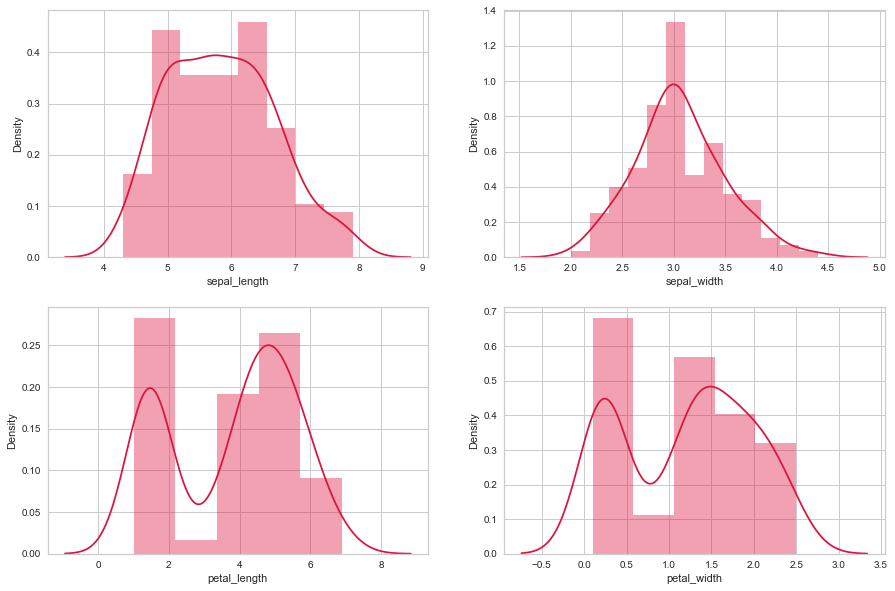

In [21]:
plt.figure(figsize = (15,10))
feature = iris.columns[:4]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(iris[i[1]],color='crimson')

## Outlier Check

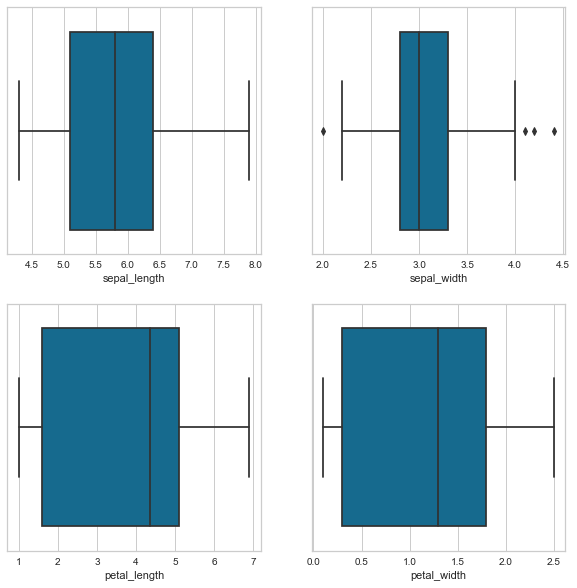

In [22]:
plt.figure(figsize = (10,10))
feature = iris.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(iris[i[1]])

In [23]:
iris.drop('ID', axis =1, inplace = True)

### Finding the Optimal Number of Clusters for KMeans Clustering

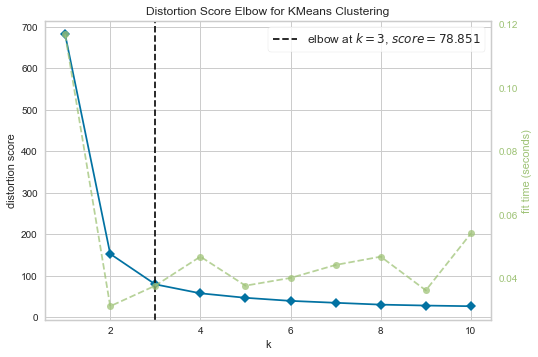

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(iris) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

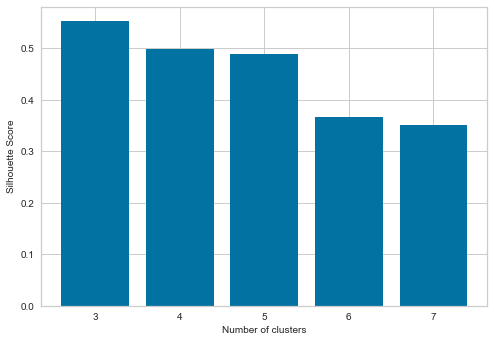

In [25]:
silhouette_scores = [] 

for n_cluster in range(3, 8):
    silhouette_scores.append( 
        silhouette_score(iris, KMeans(n_clusters = n_cluster).fit_predict(iris))) 
    
# Plotting a bar graph to compare the results 
k = [3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### instatiate KMeans class and set the number of clusters

In [26]:
km_model = KMeans(n_clusters=3, random_state=10)
km = km_model.fit_predict(X)
centroids = km_model.cluster_centers_ 
labels = km_model.labels_ 

In [27]:
X = iris.iloc[:, 0:4].values

## Visualization of clustered Data

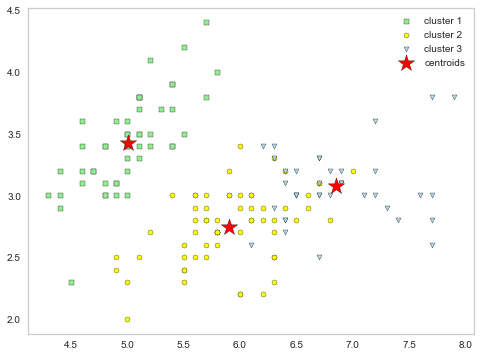

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Evaluation

In [29]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(target, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 89.33%


## Checking the above steps by spliting data into train and test

In [30]:
x_train , x_test , y_train , y_test = train_test_split(df_x,df_y,random_state=42,test_size=0.2)
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_train)
x_pred = kmeans.predict(x_test)

<IPython.core.display.Javascript object>

# Question1

### Examining the quality of the model, on different k, according to different clustering metrics

In [31]:
data = []

for k in range(2,12):
    kmean = KMeans(n_clusters=k)
    kmean.fit(x_train)
    x_pred = kmean.predict(x_test)
    data.append(({
        'WCSS': kmean.inertia_,
        'Homogenity': metrics.homogeneity_score(y_test, x_pred),
        'Completeness': metrics.completeness_score(y_test, x_pred),
        'V-measure': metrics.v_measure_score(y_test, x_pred),
        'adjusted_rand': metrics.adjusted_rand_score(y_test, x_pred),
        'rand': metrics.rand_score(y_test, x_pred),
        'mutual_info': metrics.mutual_info_score(y_test, x_pred),
        'Adjusted_mutual_info': metrics.adjusted_mutual_info_score(y_test, x_pred,
                                                 average_method='arithmetic'),
        'calinski_harabaz': metrics.calinski_harabasz_score(x_test, x_pred),
        'davies_bouldin': metrics.davies_bouldin_score(x_test, x_pred),
        'Silhouette': metrics.silhouette_score(x_test, x_pred),
    }))

results = pd.DataFrame(data=data, columns=['WCSS', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'adjusted_rand',
                                           'rand',
                                           'mutual_info',
                                           'Adjusted_mutual_info',
                                           'calinski_harabaz',
                                           'davies_bouldin',
                                           'Silhouette'],
                       index=['K:2', 'K:3','K:4',
                              'K:5','K:6','K:7',
                              'K:8','K:9','K:10','K:11'])

results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,WCSS,Homogenity,Completeness,V-measure,adjusted_rand,rand,mutual_info,Adjusted_mutual_info,calinski_harabaz,davies_bouldin,Silhouette
K:2,122.506681,0.581146,1.000000,0.735095,0.558149,0.772414,0.636514,0.723382,110.363954,0.352355,0.703075
K:3,64.882728,0.901065,0.898326,0.899694,0.898170,0.956322,0.986912,0.892369,131.206640,0.611349,0.574943
K:4,45.172513,0.811838,0.665749,0.731571,0.614663,0.843678,0.889185,0.702219,97.764558,0.799448,0.405668
K:5,38.574667,0.917726,0.674718,0.777680,0.702793,0.882759,1.005161,0.745104,127.573087,0.689960,0.510084
K:6,32.488101,0.912630,0.587959,0.715171,0.540874,0.827586,0.999580,0.664537,126.988746,0.698634,0.437903
K:7,27.658964,0.957810,0.567644,0.712830,0.522710,0.825287,1.049064,0.651968,105.672825,1.086592,0.358402
K:8,23.324223,0.957810,0.567644,0.712830,0.522710,0.825287,1.049064,0.651968,105.672825,1.086592,0.358402
K:9,21.263337,0.957810,0.529825,0.682253,0.462347,0.806897,1.049064,0.603444,87.310022,1.219229,0.246181
K:10,20.000943,0.957810,0.503446,0.659988,0.423429,0.795402,1.049064,0.563388,83.880824,1.106340,0.256886
K:11,18.676731,1.000000,0.545868,0.706228,0.482789,0.813793,1.095273,0.625133,90.292778,0.750267,0.295345


#### By paying close attention to the values obtained from the metrics and comparing them, you can see that the best k value is 3.

### The last 3 columns (calinski_harabaz, davies_bouldin, Silhouette) are do not need knowledge of Groud. So we can use them for second question

# Question2

#### If we only have training data and want to evaluate the performance of our clustering algorithm on test data, we can use cross-validation techniques. Cross-validation involves randomly splitting the available data into training and test sets multiple times and evaluating the algorithm's performance on each split. For clustering, we can use a technique known as cluster stability analysis, which is a form of cross-validation. In cluster stability analysis, we randomly subsample the data multiple times to create several different sets of training and test data. We then run our clustering algorithm on each training set and evaluate the resulting partitions on the corresponding test set.We can compute a stability index that measures the similarity between the clusters obtained from different training sets. This stability index provides an estimate of the robustness of the clustering algorithm, indicating how well it generalizes to new data.Another approach is to use metrics that do not require ground truth labels, such as silhouette coefficient or Calinski-Harabasz index. These metrics can help us evaluate the quality of clusters without requiring test data with known labels.In general, using cross-validation techniques can provide a more reliable estimate of the performance of a clustering algorithm on unseen data. However, it's also important to keep in mind that cluster analysis is an unsupervised learning technique, which means that we cannot guarantee perfect performance on unseen data, and we should always interpret the results with care.

#### Here I'm gonna use cross validation using 'silhouette' metric (on different random samples of the dataset (with different k values))

# Cross Validation

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5528190123564095
For n_clusters = 4 The average silhouette_score is : 0.49805050499728737
For n_clusters = 5 The average silhouette_score is : 0.48874888709310566
For n_clusters = 6 The average silhouette_score is : 0.36784649847122436


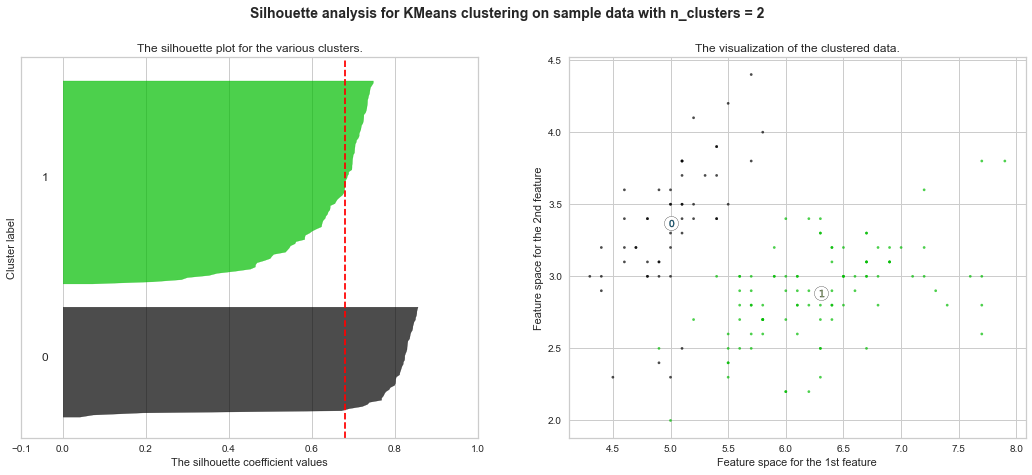

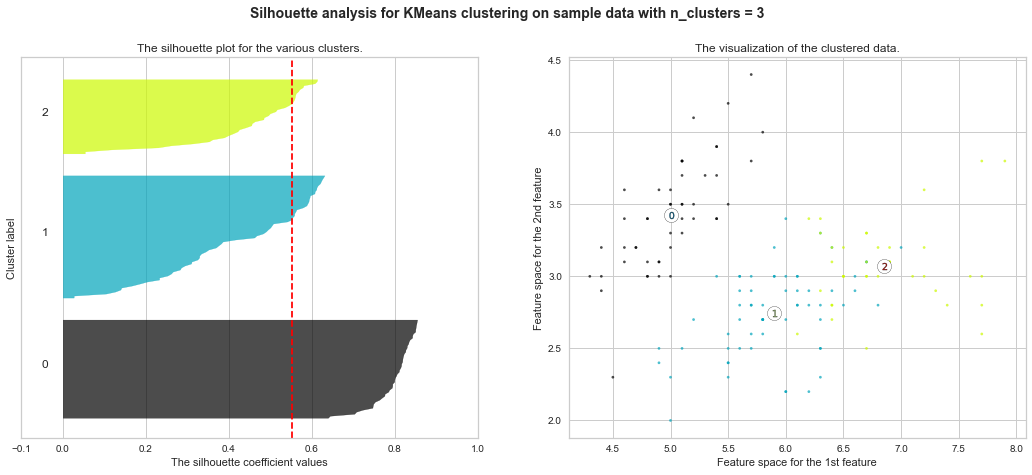

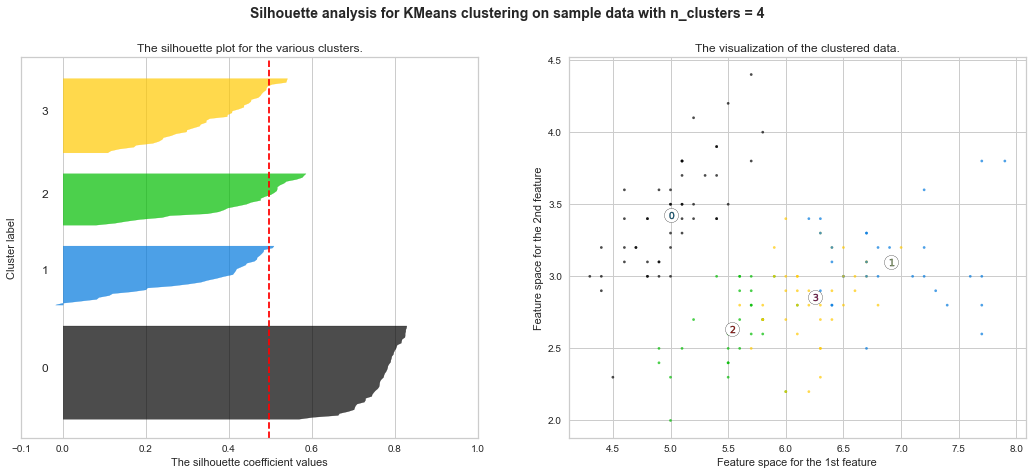

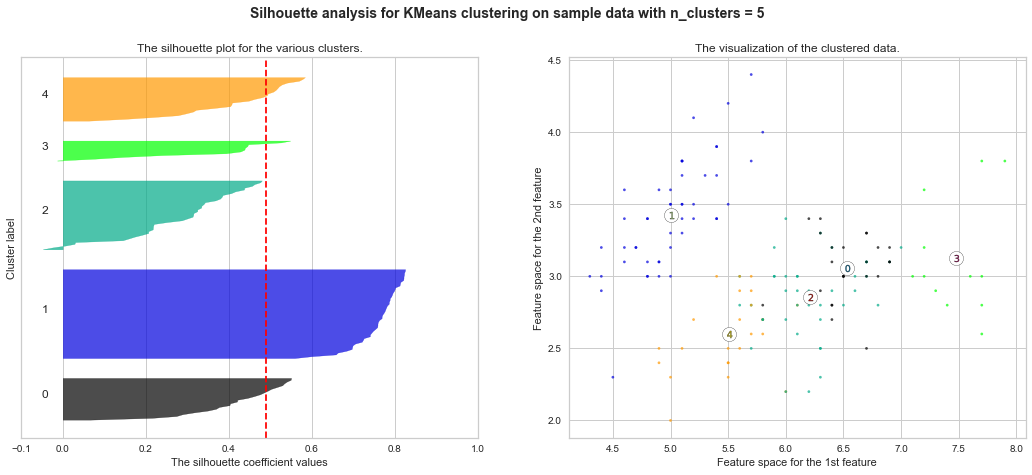

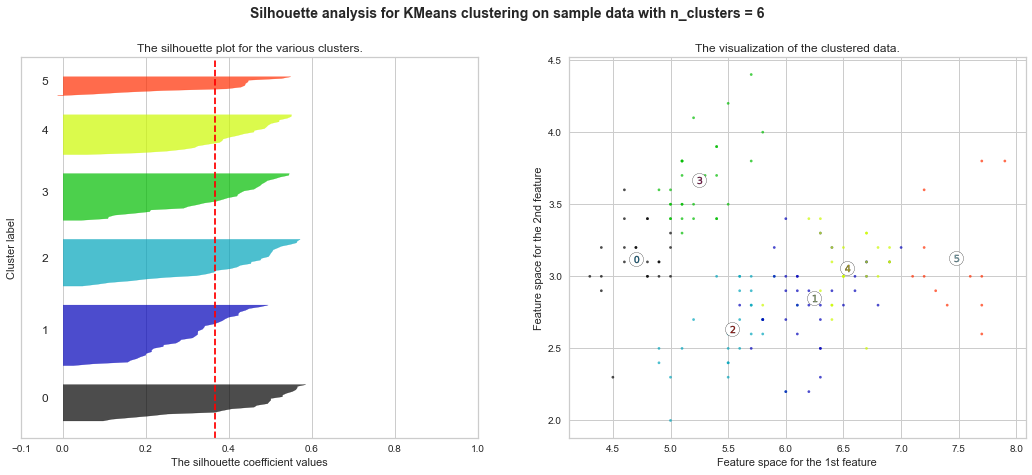

In [32]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_x)

    silhouette_avg = silhouette_score(df_x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_x[:, 0], df_x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Continue Analysing Choosing Optimal Cluster Number

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = iris.iloc[:, [0, 1, 2 , 3]].values
y_kmeans = kmeans.fit_predict(x)

In [34]:
df_kmean = iris.copy()

In [35]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [36]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [37]:
df_kmean.label.value_counts()

0    62
1    50
2    38
Name: label, dtype: int64

In [38]:
listt = [x for x in range(1,151)]
index = pd.DataFrame(listt)
df_kmean['ID'] = index

### Making sense out of the clsuters

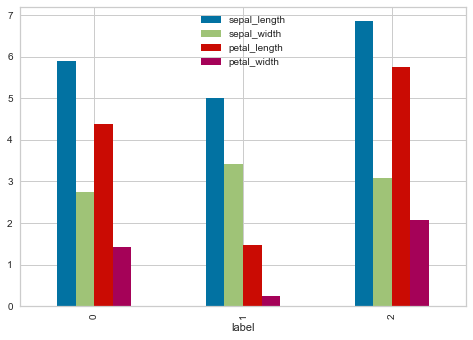

In [39]:
df_kmean.drop('ID', axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

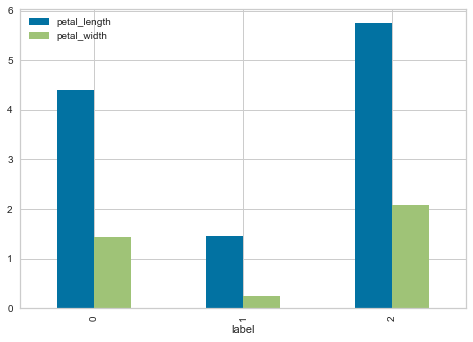

In [40]:
df_kmean.drop(['ID', 'sepal_length', 'sepal_width'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()